In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import string
# from autoviz.AutoViz_Class import AutoViz_Class # Error!
import scipy.stats as stats
warnings.filterwarnings("ignore")
%matplotlib inline

# EDA

Data retrieval protocol:
1. Saving data indicators (Types, min, max) in files
2. Generating an automatic report using AutoViz
3. Data description
4. Statistical indices
5. Diagrams to describe the various data
6. Target description
7. Relationships between the data:
   - Correlation.
   - Continuous distribution table - Skewness
   - t-test, Anova

In [80]:
df = pd.read_pickle("/Users/mortzabari/Desktop/Mor/Academic/Data Science Course/Jupiter Notebooks/final project/CancerData_After_DP.pkl")
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Saving data indicators (Types, min, max) in files

In [82]:
# Create an ExcelWriter object
with pd.ExcelWriter("cancer_data_analysis.xlsx") as writer:
    # Type of values
    df.dtypes.to_excel(writer, sheet_name='data_type')
    
    # Maximum values
    df.max().to_excel(writer, sheet_name='max')
    
    # Minimum values
    df.min().to_excel(writer, sheet_name='min')
    
    # Missing values
    df.isnull().sum(axis=0).to_excel(writer, sheet_name='NA')
    
    # Unique values
    df.nunique().to_excel(writer, sheet_name='unique')


### Generating an automatic report using AutoViz
Raises an error, therefore marked as comment

In [84]:
# Error
# AV = AutoViz_Class()
# AV.AutoViz('CancerData_After_DP.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    string 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [86]:
df.shape

(569, 31)

In [87]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Dividing the dataset into sub-datasets according to dtypes

In [89]:
# Dummy Columns
cols_dummy= ['diagnosis']
dummy_df = df[cols_dummy]

# Continuous Columns
continuous_df = df.loc[:,df.columns != 'diagnosis']

### Diaplay plots for each feature according to its type
- For dummy dataset - boxplot
- For continous dataset - hisplot

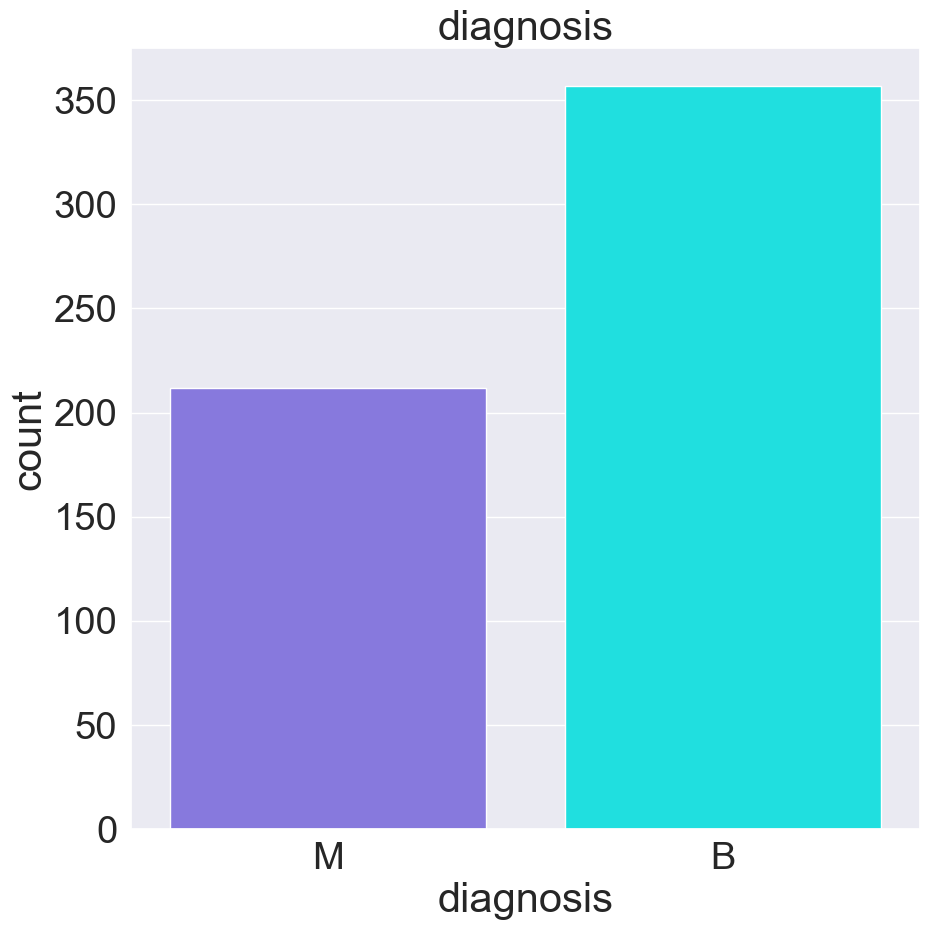

In [91]:
a = 1  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in dummy_df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(x=dummy_df[i], palette=['mediumslateblue','cyan'])
        c = c + 1
fig.tight_layout()
plt.show()

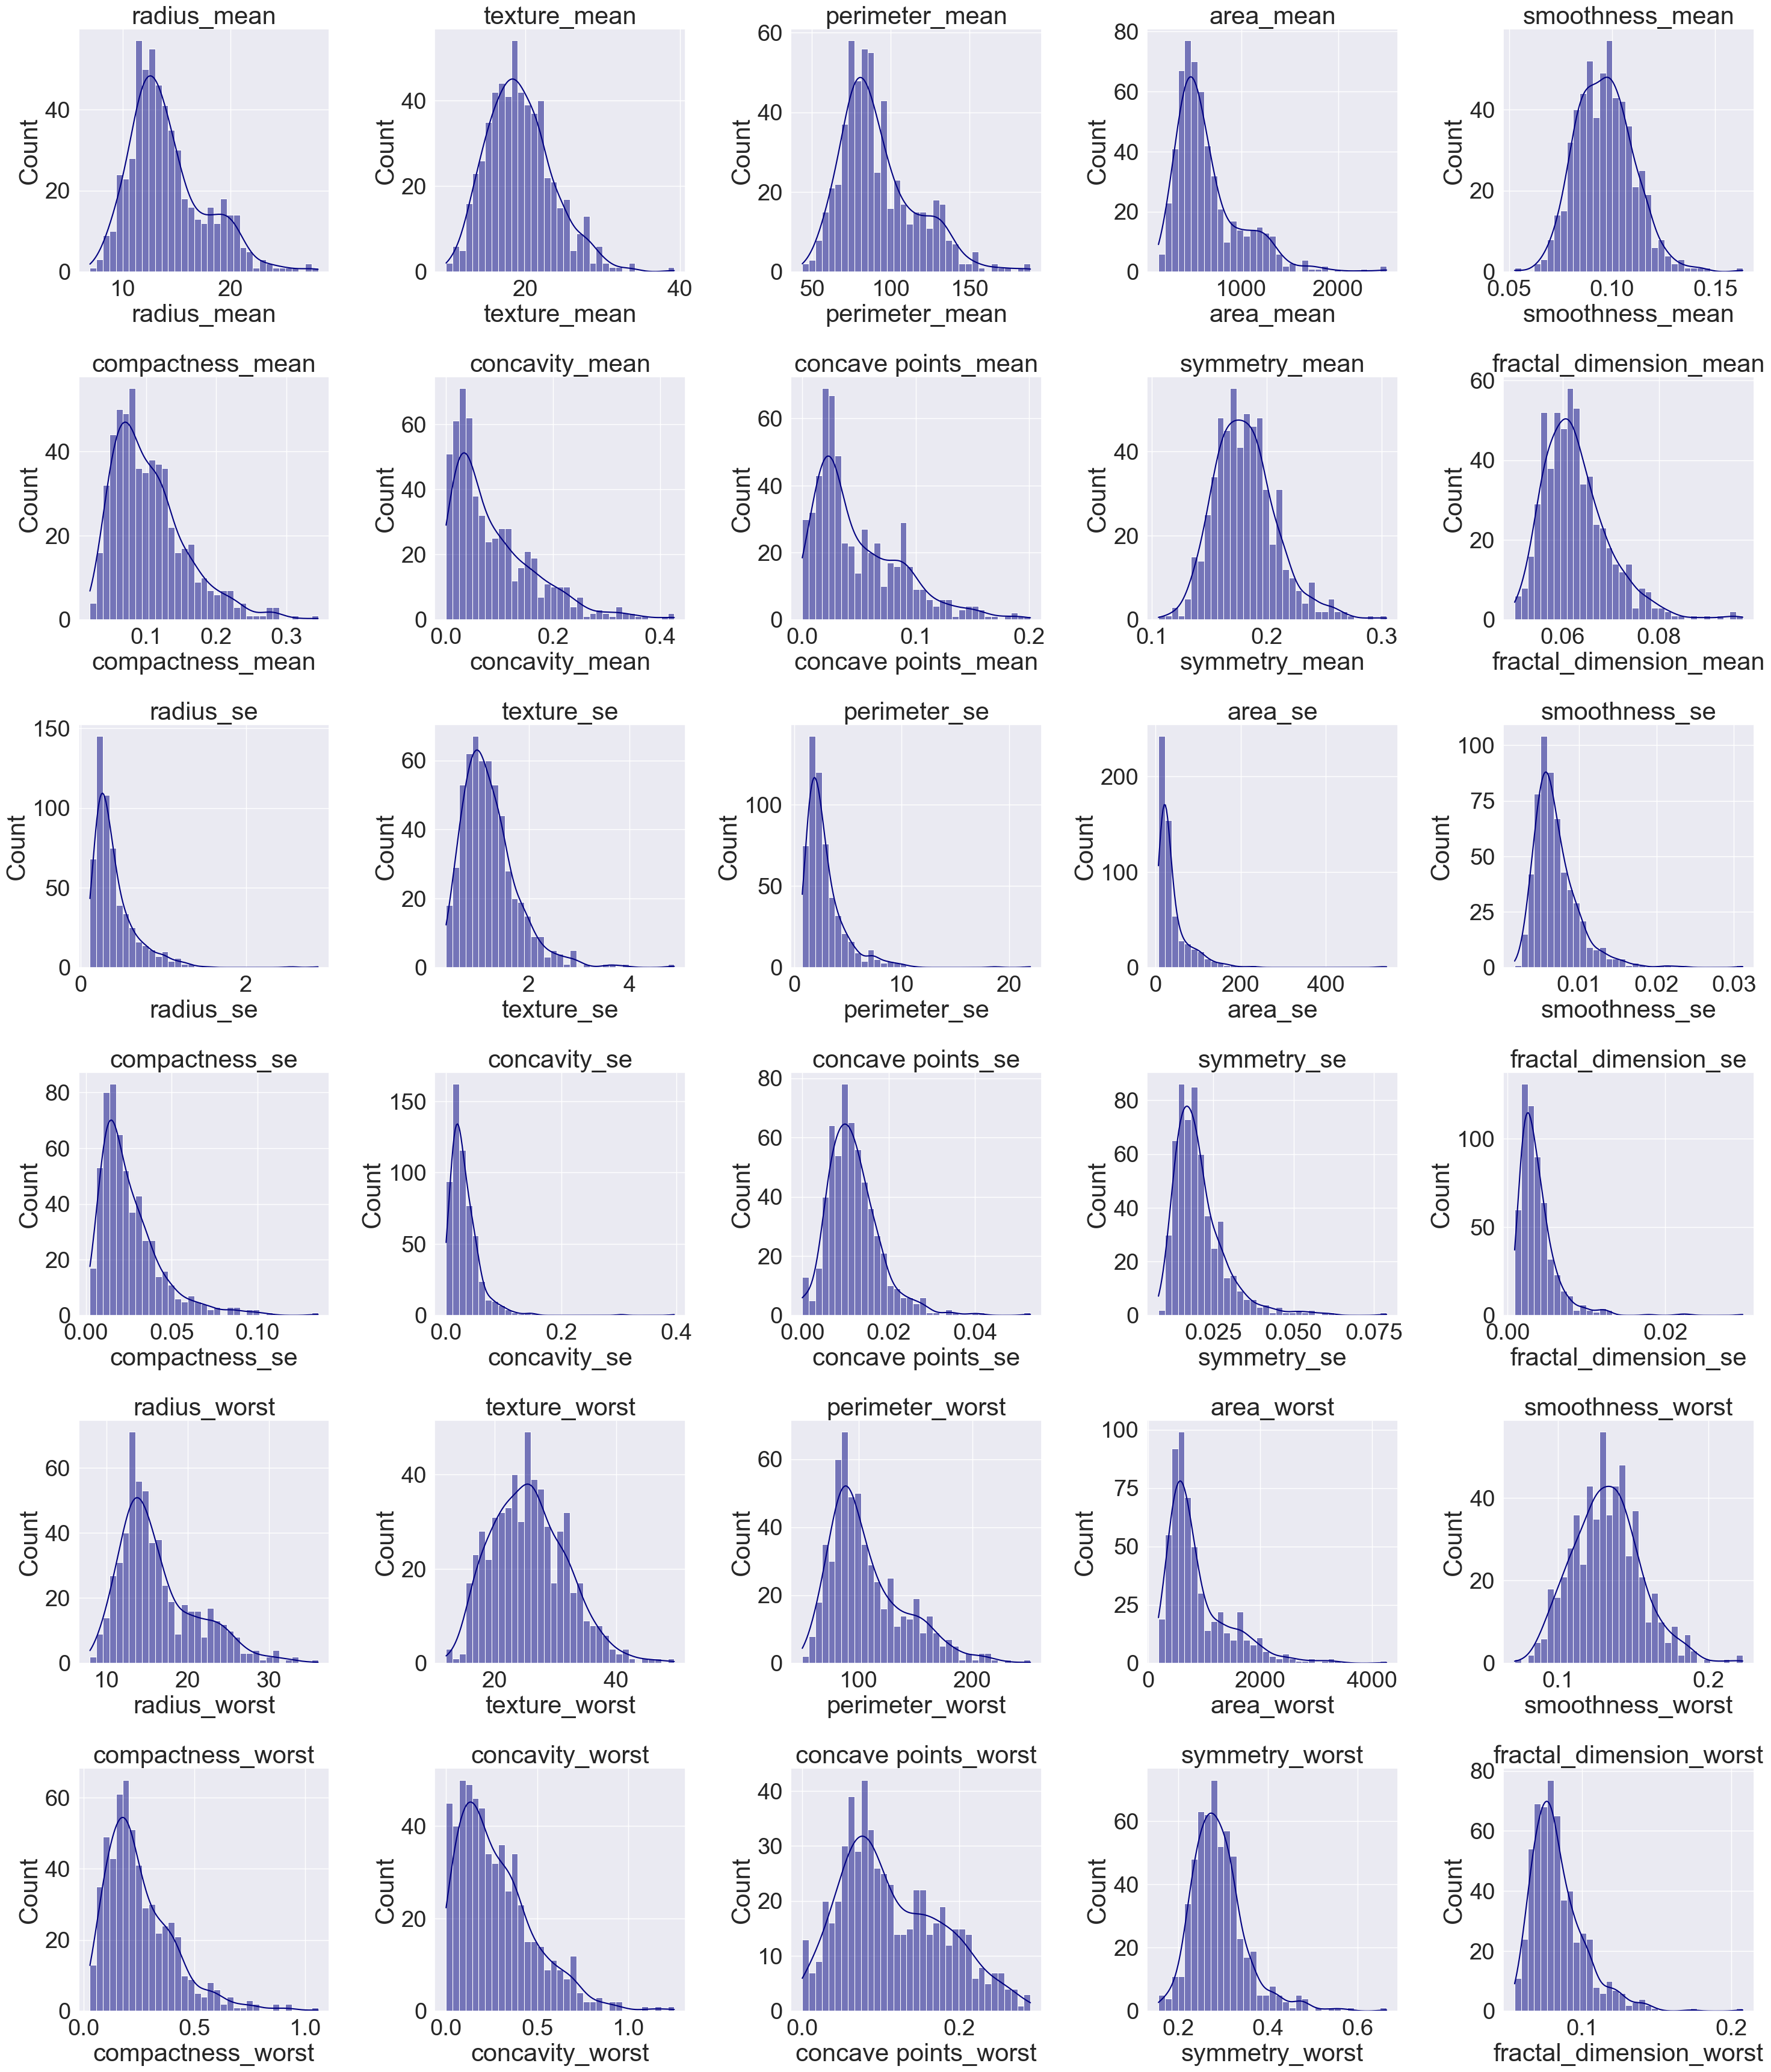

In [92]:
a = 7  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in continuous_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)  # Set the x-label
    sns.histplot(continuous_df[i], bins=35, kde=True, color='navy')  # Create histogram with KDE
    c = c + 1

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()

### Target Feature Description

In [94]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: Int64

 - 'diagnosis' feature - categorial binary feature with two classes 'B' and 'M'
 - 'B' - 352 instances
 - 'M' - 200 instances

<Axes: xlabel='diagnosis', ylabel='count'>

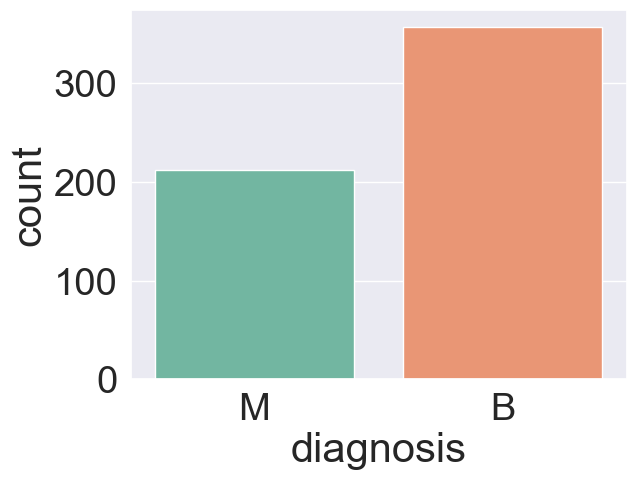

In [96]:
#Target Value is a Dummy Value
sns.countplot(x='diagnosis', data=df, palette='Set2')

In [97]:
continuous_df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

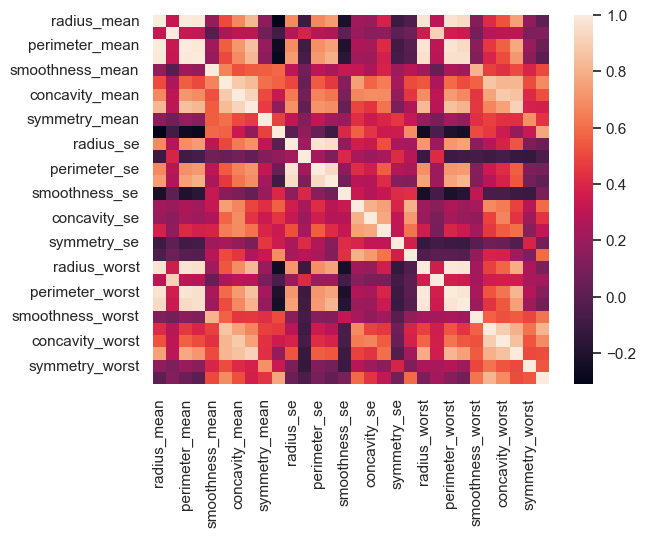

In [98]:
sns.set(font_scale=1)
sns.heatmap(continuous_df.corr())

In [99]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(continuous_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
area_se,5.447186
concavity_se,5.110463
fractal_dimension_se,3.923969
perimeter_se,3.443615
radius_se,3.088612
smoothness_se,2.314450
symmetry_se,2.195133
compactness_se,1.902221
area_worst,1.859373
fractal_dimension_worst,1.662579


- Most of the features are not normaly distributed - Marked on green.
- This can also be seen from the histograms shown earlier. Most of the feature are skewed normally distributed.

In [101]:
def ttest_result_display(feature):
    malignant = df[df['diagnosis'] == 'M'][feature]
    benign = df[df['diagnosis'] == 'B'][feature]
    
    # Perform an independent samples t-test
    t_stat, p_value = stats.ttest_ind(malignant, benign)
    
    # Print the results
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    
    # Plotting the distribution
    plt.figure(figsize=(20, 6))
    sns.histplot(malignant, kde=True, color='blue', label='malignant', alpha=0.5)
    sns.histplot(benign, kde=True, color='green', label='benign', alpha=0.5)
    plt.title(f'Diagnosis by {feature}')
    plt.xlabel('Diagnosis')
    plt.ylabel(f'{feature}')
    plt.legend()
    plt.grid(True)
    plt.show()

T-statistic: 26.405212979192665
P-value: 8.436251036174729e-101


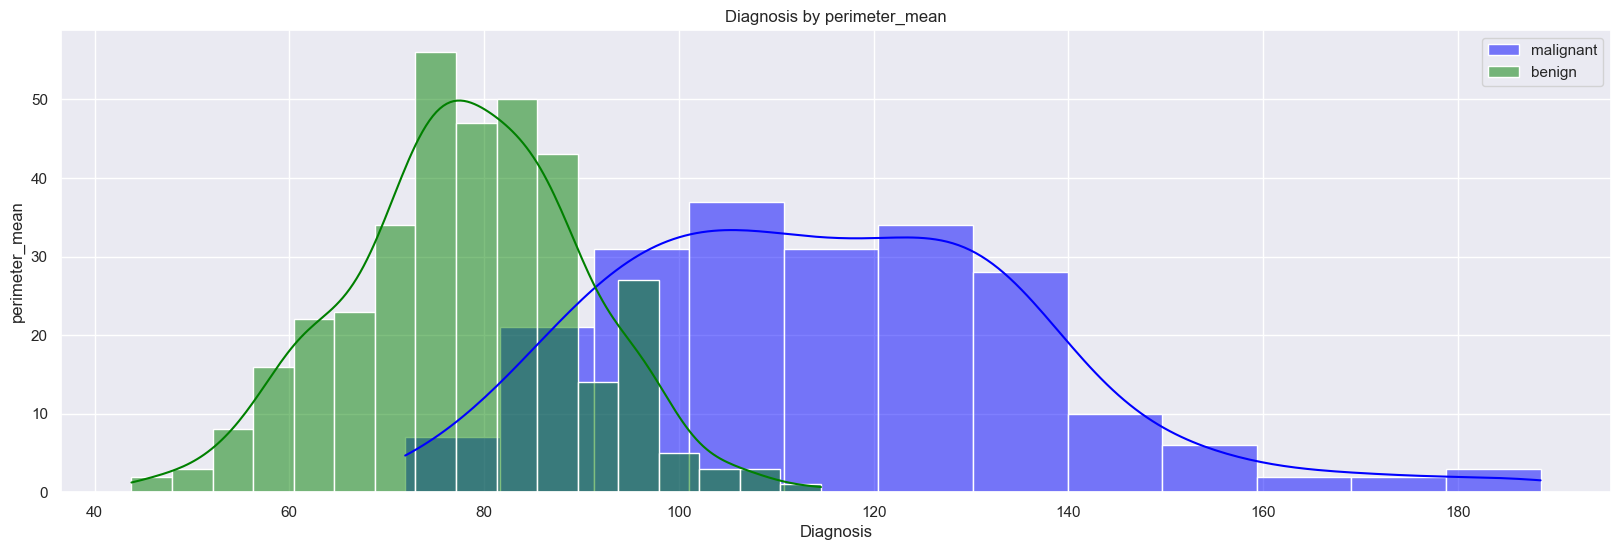

In [102]:
ttest_result_display('perimeter_mean')

T-statistic: 25.435821610057054
P-value: 8.465940572262181e-96


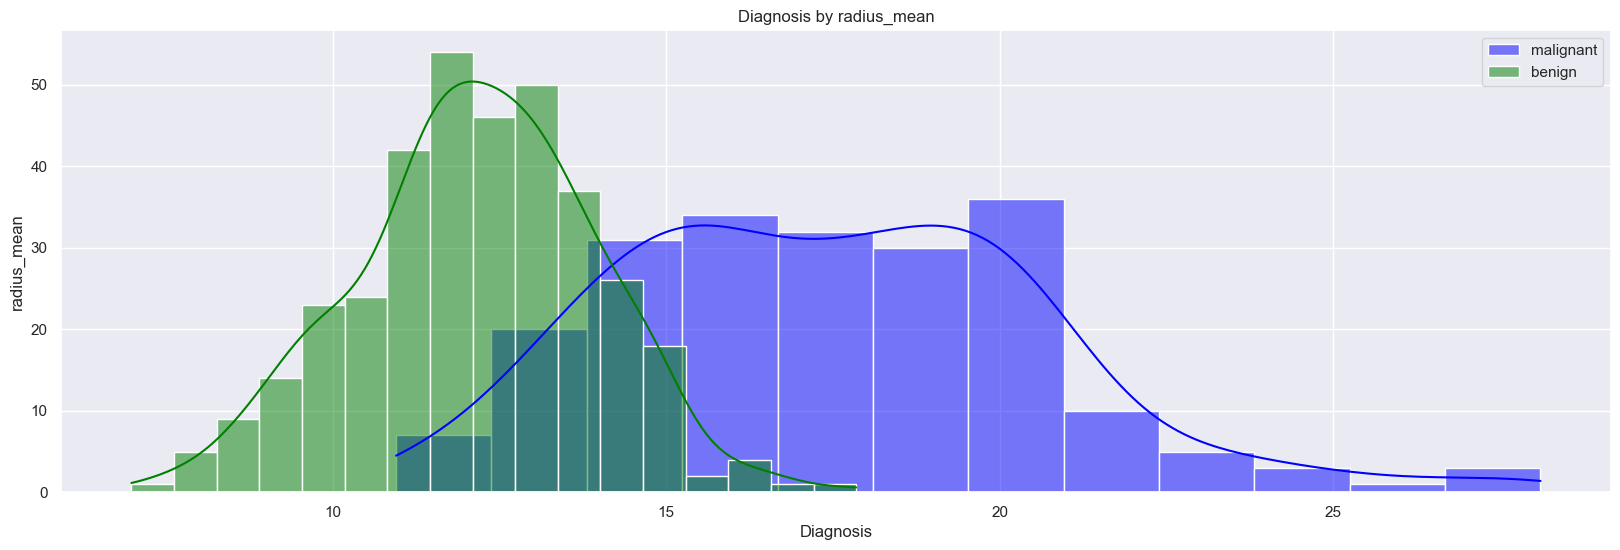

In [103]:
ttest_result_display('radius_mean')

T-statistic: 8.338311789592808
P-value: 5.733384028466827e-16


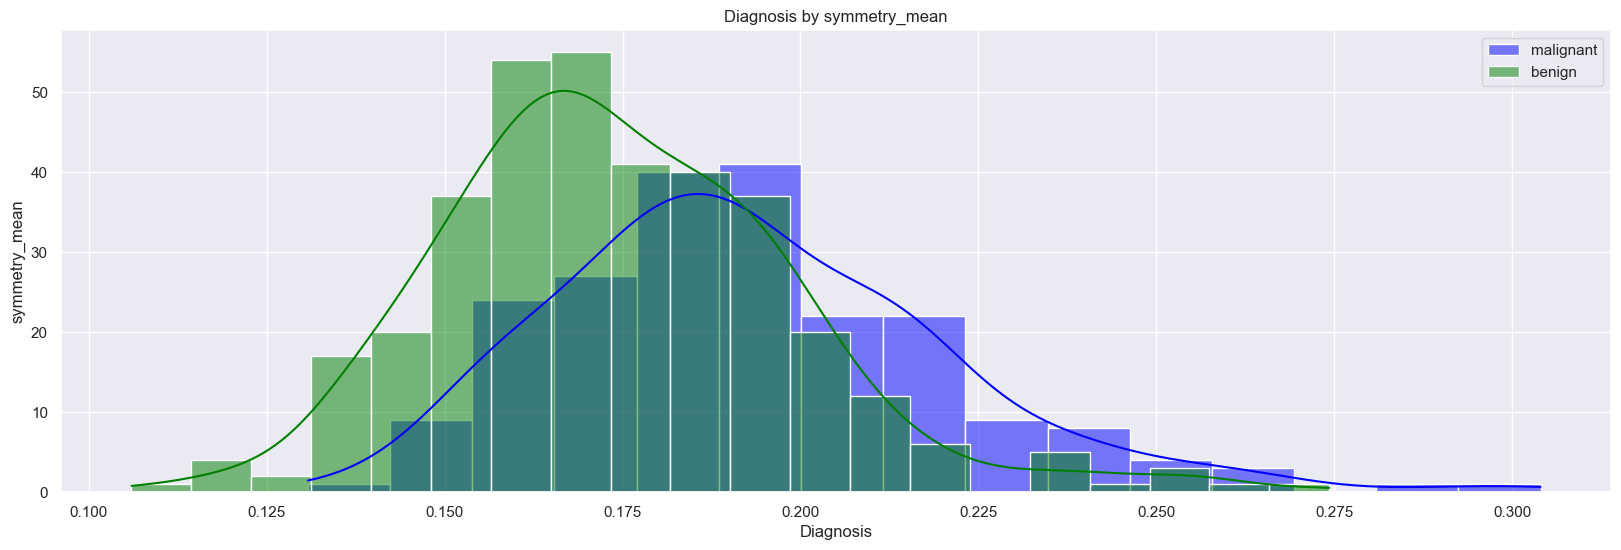

In [104]:
ttest_result_display('symmetry_mean')

T-statistic: 10.86720108146434
P-value: 4.058636047898074e-25


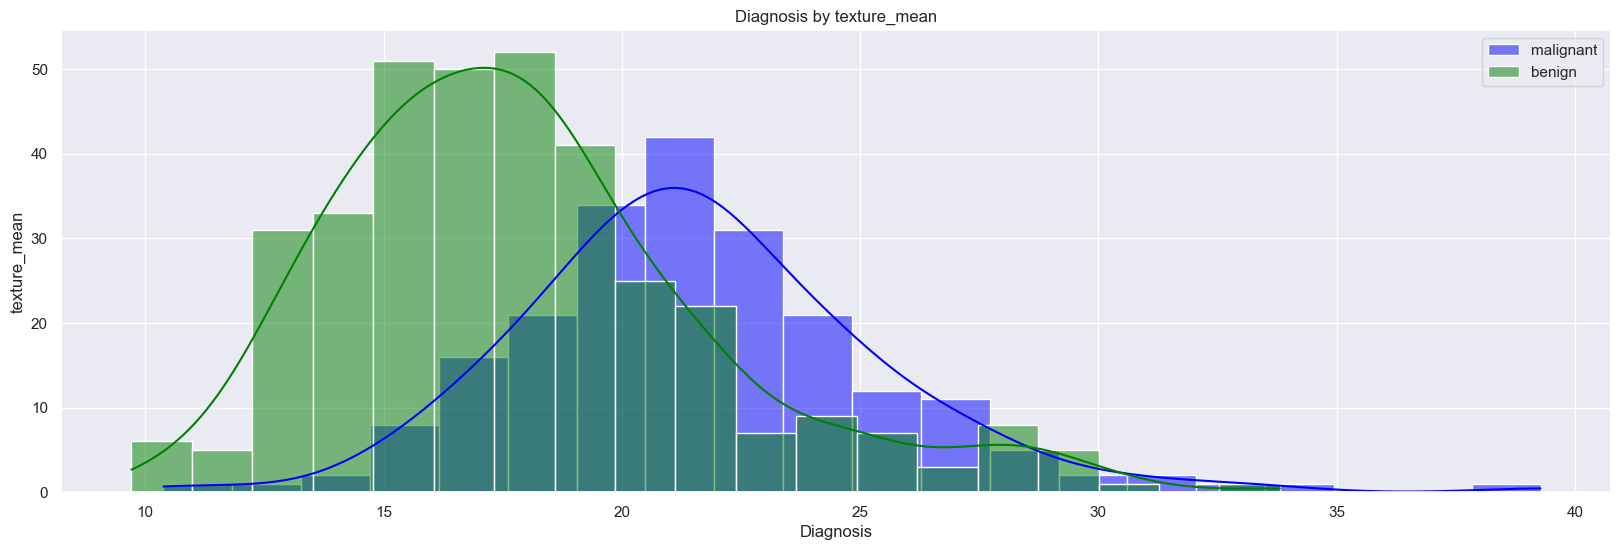

In [105]:
ttest_result_display('texture_mean')

T-statistic: 12.23098134599393
P-value: 1.0780574879494241e-30


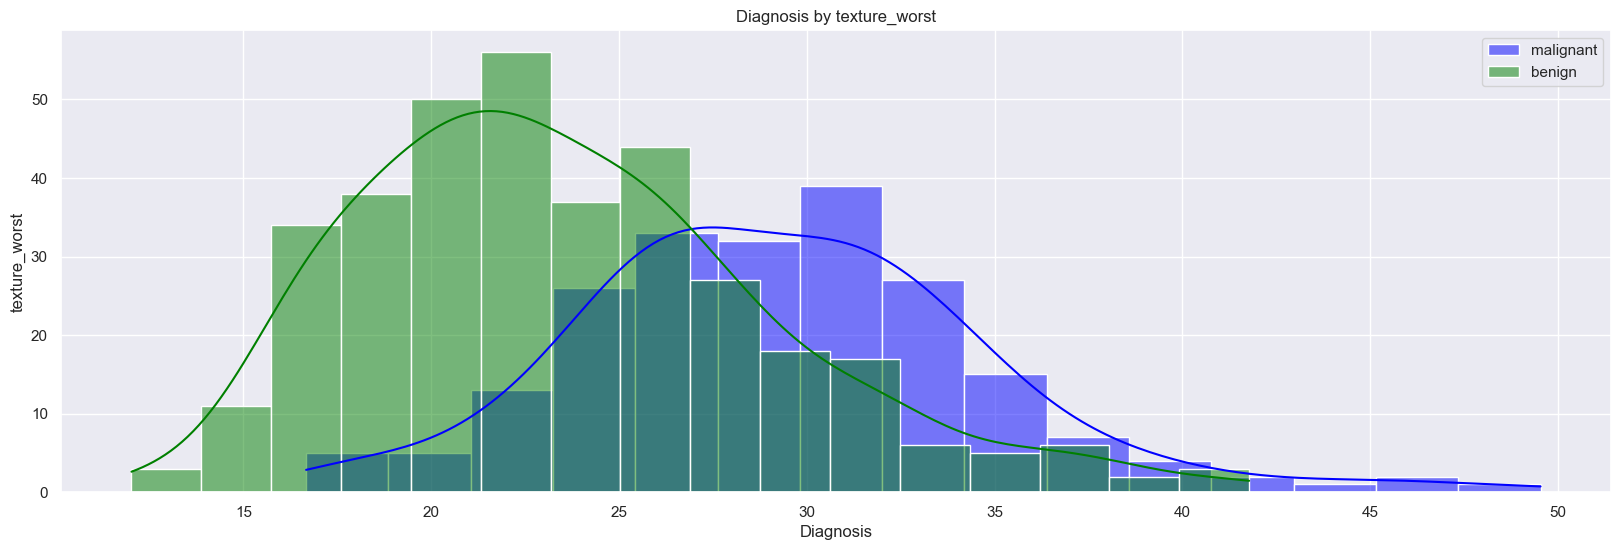

In [106]:
ttest_result_display('texture_worst')

T-statistic: 31.054555115984236
P-value: 1.9690997072164375e-124


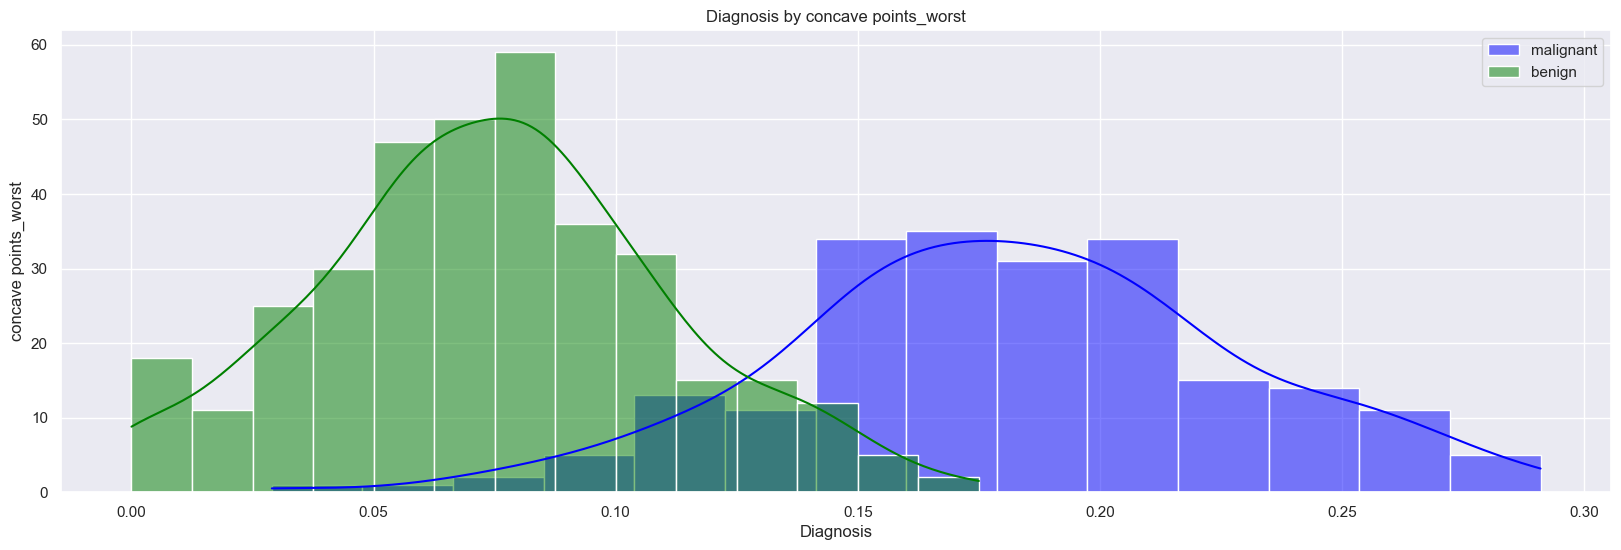

In [107]:
ttest_result_display('concave points_worst')

T-statistic: 9.146098808149038
P-value: 1.0518503592032013e-18


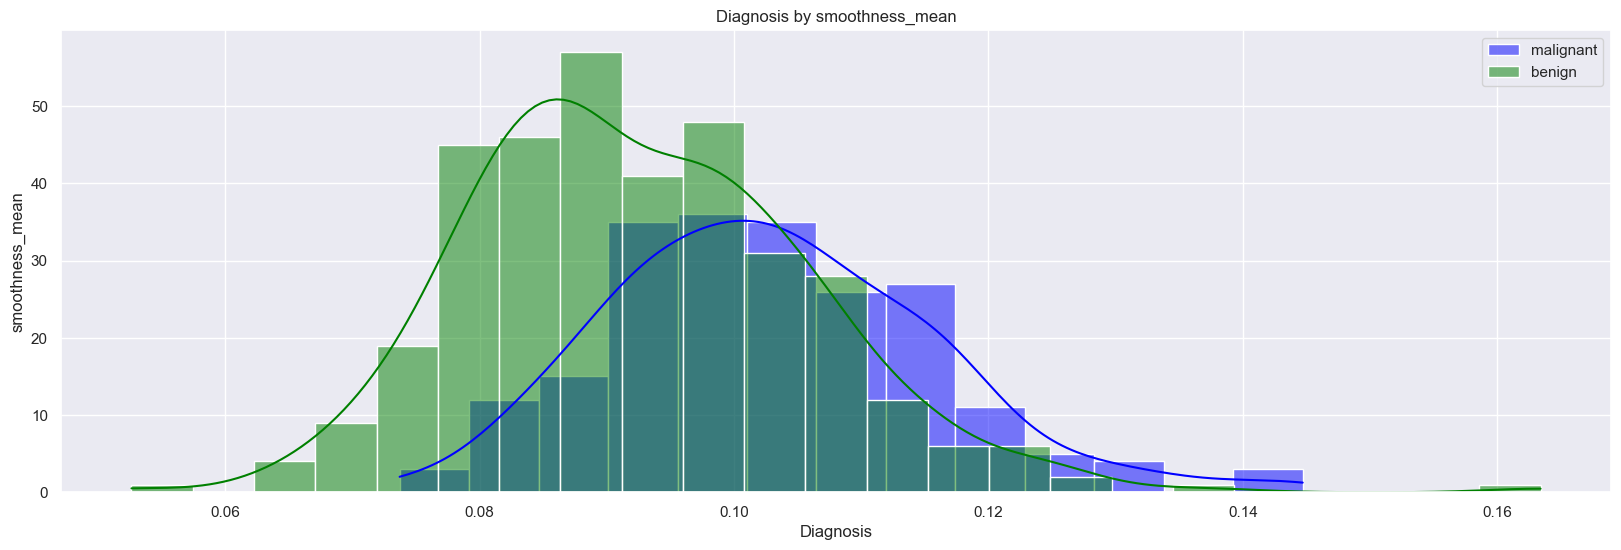

In [108]:
ttest_result_display('smoothness_mean')

T-statistic: 11.066746606769504
P-value: 6.575143633984769e-26


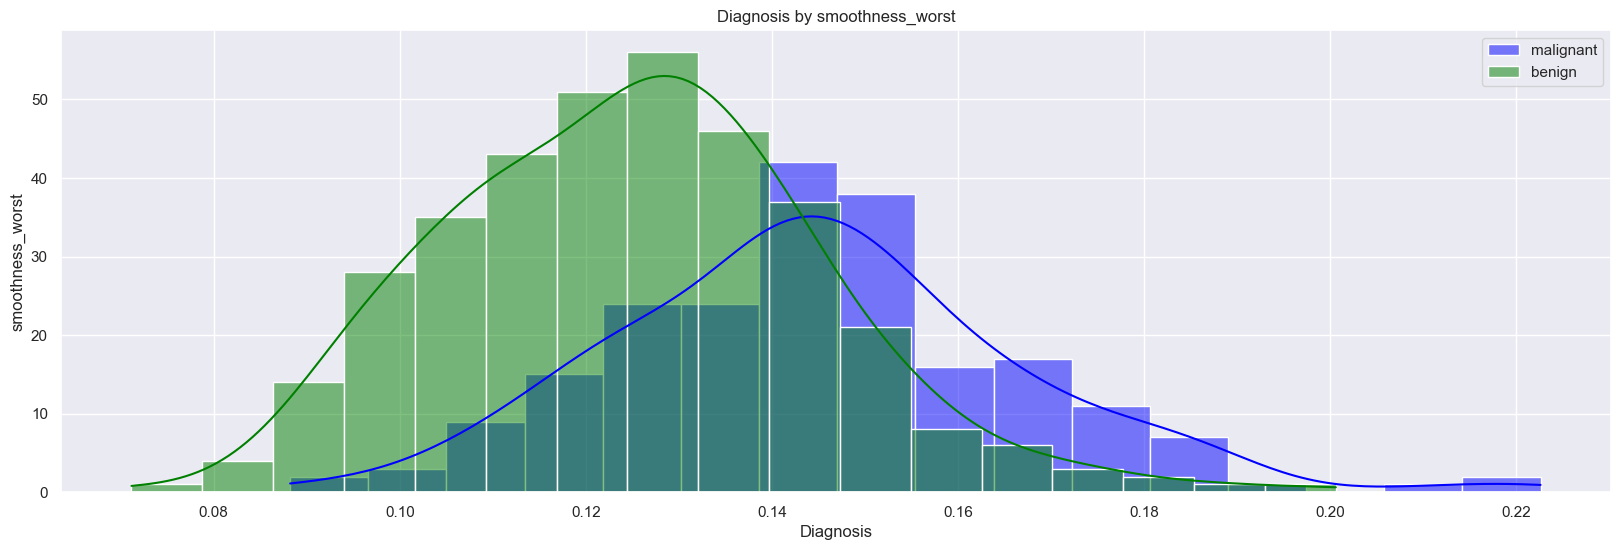

In [109]:
ttest_result_display('smoothness_worst')

### Running ANOVA only on normal distribution columns

In [111]:
# List of normally distributed columns
normal_columns = ['perimeter_mean', 'radius_mean', 'symmetry_mean', 'texture_mean', 'texture_worst', 'concave points_worst', 
                  'smoothness_mean', 'smoothness_worst']

# Perform ANOVA for each normally distributed column
for col in normal_columns:
    # Group data by the categorical variable (e.g., 'diagnosis')
    groups = [df[df['diagnosis'] == category][col] for category in df['diagnosis'].unique()]
    
    # Perform ANOVA using scipy.stats.f_oneway
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"ANOVA for {col}:")
    print(f"  F-statistic: {f_stat}")
    print(f"  P-value: {p_value}\n")

ANOVA for perimeter_mean:
  F-statistic: 697.2352724765257
  P-value: 8.43625103617395e-101

ANOVA for radius_mean:
  F-statistic: 646.9810209786452
  P-value: 8.46594057226382e-96

ANOVA for symmetry_mean:
  F-statistic: 69.52744350046247
  P-value: 5.73338402846732e-16

ANOVA for texture_mean:
  F-statistic: 118.09605934497965
  P-value: 4.0586360478986136e-25

ANOVA for texture_worst:
  F-statistic: 149.5969046860517
  P-value: 1.0780574879494634e-30

ANOVA for concave points_worst:
  F-statistic: 964.3853934517023
  P-value: 1.9690997072169153e-124

ANOVA for smoothness_mean:
  F-statistic: 83.65112340842511
  P-value: 1.051850359203376e-18

ANOVA for smoothness_worst:
  F-statistic: 122.47288045844454
  P-value: 6.575143633985019e-26



## Saving the Dataset
- No changes were made to the dataset.
- This phase was only a research phase to learn and draw conclusions from the dataset.
- Therefore there is no need to save to another file.
- In the next step we will use the file we saved from the first step.